In [39]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv("Titanic_Dataset.csv")

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset contains 12 columns including the target column Survived and 891 rows

In [43]:
#Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
#checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

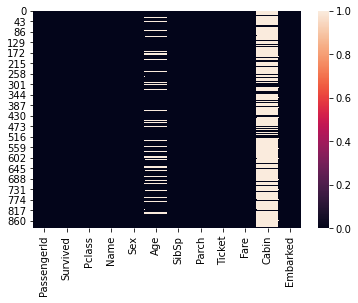

In [45]:
#Checking null values using heatmap
sns.heatmap(df.isnull())

Around 15% of the data is missing. The age can be replaced by reasonable replacement with some form of Imputation. The cabin column seems not to give any relevant information so we can drop it or can replace it with 0 or 1 we can see it on a later stage.

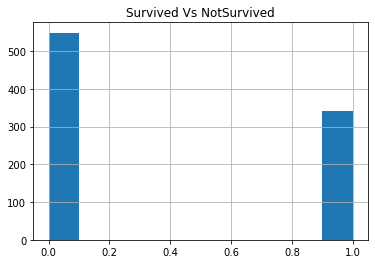

In [46]:
#checking for data imbalance
df['Survived'].hist(grid=True)
plt.title("Survived Vs NotSurvived")
plt.show()

There is no data imbalance

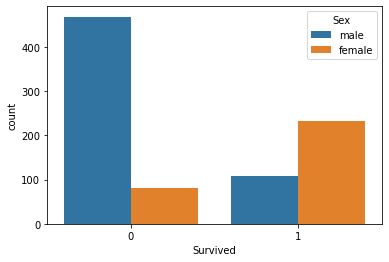

In [47]:
sns.countplot(x="Survived",hue="Sex",data=df)

From this graph we conclude more male passengers died in that ship

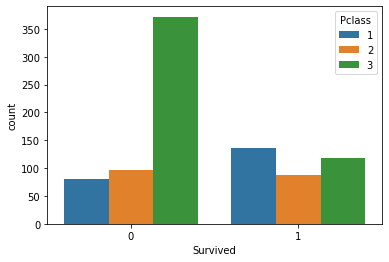

In [48]:
sns.countplot(x="Survived",hue="Pclass",data=df)

From this graph we conclude more passengers travelling in 3rd class died in that ship

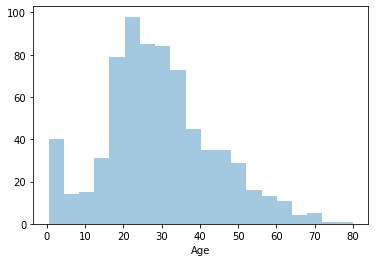

In [49]:
sns.distplot(df["Age"].dropna(),kde=False)

From this graph we can conclude that most of the people were in the age group of 15 to 35 years

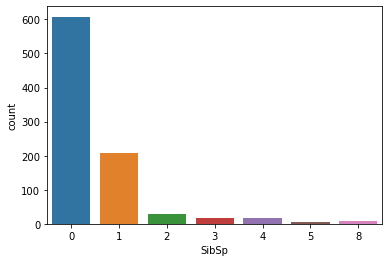

In [50]:
sns.countplot(x='SibSp',data=df)

From this graph it is clear mostly the passengers were travelling alone, few passengers travelled either with 1 sibbling or spouse,very few with 2 sibblings or spouse

# Data Cleansing

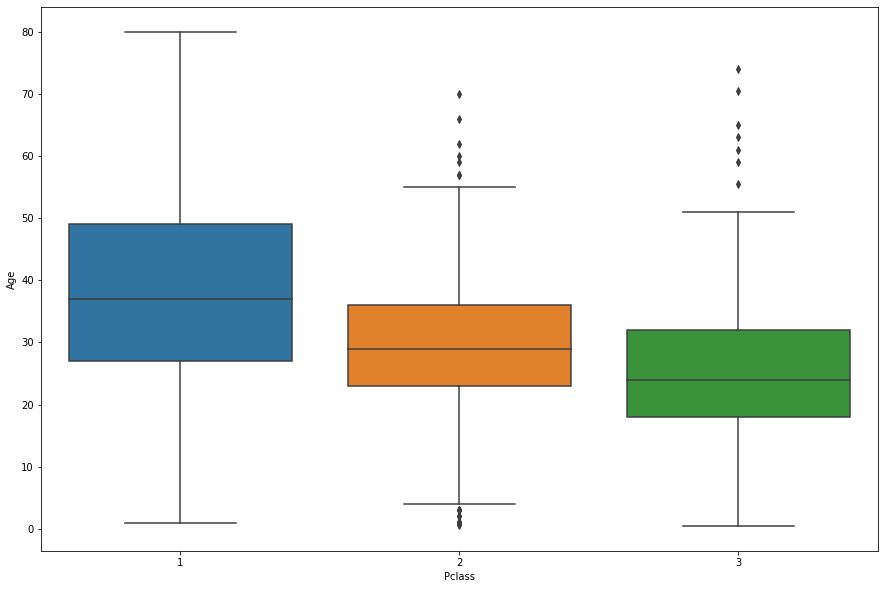

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Pclass",y="Age",data=df)

From the above boxplot we get that the mean age of passengers in Class 1 is around 38,mean age of passengers in class 2 is around 28 and mean age of passengers in class 3 is about 25.
So we will be replacing the Nan values according to the classes

In [52]:
df.columns
    

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 28
        else:
            return 25
        
    else:
        return Age

In [54]:
df['Age']=df[["Age","Pclass"]].apply(age,axis=1)

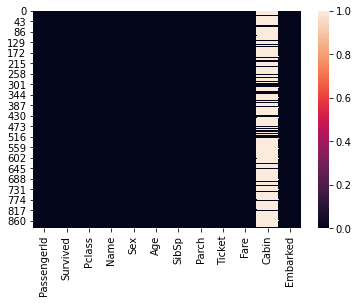

In [55]:
sns.heatmap(df.isnull())

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's Drop cabin column as it has lot of null values and cabin no. does not give any proper information about whether a passenger survived or not

In [57]:
df.drop("Cabin",axis=1,inplace=True)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorical Features such as sex and Embarked using getdummies

In [59]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)

In [60]:
sex=pd.get_dummies(df["Sex"],drop_first=True)

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Let us drop the columns which is not required as well as append the dataset with convertes sex and embarked columns

In [62]:
df.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [64]:
df=pd.concat([df,sex,embark],axis=1)

In [65]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [66]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


dropping passenger id as well

In [67]:
df.drop("PassengerId",axis=1,inplace=True)

In [68]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# OUTLIERS CHECKING

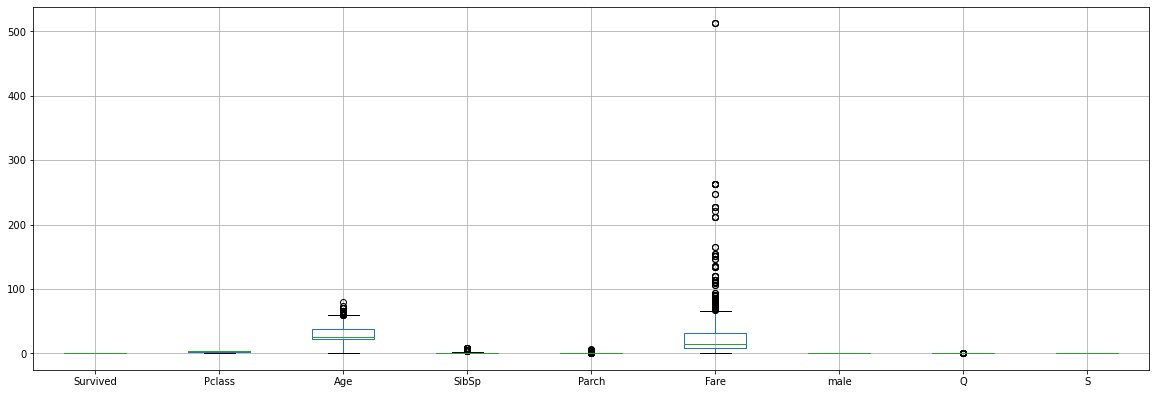

In [69]:
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

The boxplot confirms the presence of outliers so we will remove the outliers withing the given limit

In [70]:
z=np.abs(zscore(df))
z.shape

(891, 9)

In [71]:
threshold=3
print(np.where(z>3))

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88,  96, 109, 116, 116, 118, 119, 126,
       143, 156, 159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198,
       201, 208, 214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278,
       278, 280, 289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358,
       359, 360, 364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437,
       438, 438, 459, 468, 480, 493, 501, 502, 510, 517, 525, 527, 541,
       542, 552, 557, 560, 567, 573, 593, 610, 612, 613, 626, 629, 630,
       638, 653, 654, 657, 672, 678, 679, 680, 683, 686, 689, 697, 700,
       703, 716, 718, 727, 730, 736, 737, 742, 745, 749, 767, 768, 774,
       776, 778, 779, 787, 787, 790, 792, 813, 824, 825, 828, 846, 850,
       851, 858, 863, 885, 885, 890], dtype=int64), array([7, 4, 3, 7, 7, 4, 5, 7, 7, 7, 7, 7, 3, 3, 3, 3, 7, 4, 5, 2, 7, 2,
       7, 5, 3, 7, 7, 7, 3, 3, 4, 3, 7, 3, 3, 7, 7, 7, 7, 3, 7, 7, 3, 7,
       7,

In [72]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 9)
(749, 9)


In [73]:
loss_percentage=(891-749)/891*100
print(loss_percentage)

15.937149270482603


As there is huge loss of data we cannot consider removing Outliers

# SPLITTING THE DATASET

In [74]:
x=df.drop("Survived",axis=1)

In [75]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [76]:
y=df["Survived"]

In [77]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# CHECKING SKEWNESS

In [78]:
x.skew()

Pclass   -0.630548
Age       0.519936
SibSp     3.695352
Parch     2.749117
Fare      4.787317
male     -0.618921
Q         2.948778
S        -0.997083
dtype: float64

so skewness is not within the limit

In [79]:
from sklearn.preprocessing import power_transform

In [81]:
x1=power_transform(x,method="yeo-johnson")

# SCALING THE DATA

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[ 0.86397329, -0.50034525,  1.37363642, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.45912855,  0.68796744,  1.37363642, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.86397329, -0.18885475, -0.67984996, ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 0.86397329, -0.2656502 ,  1.37363642, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-1.45912855, -0.18885475, -0.67984996, ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 0.86397329,  0.25894104, -0.67984996, ...,  0.73769513,
         3.25137334, -1.61470971]])

# TRAINING AND TESTING THE DATA

In [85]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# FINDING BEST RANDOM STATE

In [86]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

Best Accuracy Score is:  0.8731343283582089 on Random_state:  150


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=150)

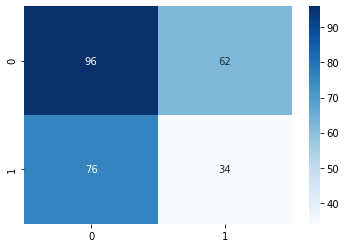

In [89]:
cm=confusion_matrix(y_test,predlr)
sns.heatmap(cm,annot=True,cmap="Blues")

In [92]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [93]:
eval(LogisticRegression())

0.8731343283582089
[[146  12]
 [ 22  88]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       158
           1       0.88      0.80      0.84       110

    accuracy                           0.87       268
   macro avg       0.87      0.86      0.87       268
weighted avg       0.87      0.87      0.87       268



In [94]:
eval(DecisionTreeClassifier())

0.7873134328358209
[[131  27]
 [ 30  80]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       158
           1       0.75      0.73      0.74       110

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [95]:
eval(SVC())

0.6791044776119403
[[148  10]
 [ 76  34]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       158
           1       0.77      0.31      0.44       110

    accuracy                           0.68       268
   macro avg       0.72      0.62      0.61       268
weighted avg       0.71      0.68      0.64       268



In [96]:
eval(RandomForestClassifier())

0.8432835820895522
[[143  15]
 [ 27  83]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       158
           1       0.85      0.75      0.80       110

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.84      0.84      0.84       268



# Cross Validation

In [97]:
scr=cross_val_score(LogisticRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR 0.7979976147134518


In [98]:
scr=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("scr for DTC",scr.mean())

scr for DTC 0.7755570899504113


In [99]:
scr=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("scr for RFC",scr.mean())

scr for RFC 0.8047266336074319


In [100]:
scr=cross_val_score(SVC(),x,y,cv=5)
print("scr for SVM",scr.mean())

scr for SVM 0.674615529470843


In [101]:
#calculating differencec between accuracy score and cv score
LR1=(.8731-.7979)*100
DTC1=(.7873-.7755)*100
RFC1=(.8432-.8047)*100
SVC1=(.6791-.6746)*100

In [102]:
LR1

7.519999999999993

In [103]:
DTC1

1.1800000000000033

In [104]:
RFC1

3.849999999999998

In [105]:
SVC1

0.45000000000000595

From above calculation we get that SVC is the best model

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
#Parameters for SVC()
parameters={'C': [0.1,1,10,100,1000],
           'kernel':['poly','rbf','sigmoid']}

In [108]:
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [109]:
SVC_mod=SVC(kernel='rbf',C=1000)
SVC_mod.fit(x_train,y_train)
pred=SVC_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.82089552238806


There is a huge increase in the accuracy_score...which shows great model performance

# AUC_ROC Curve

In [110]:
from sklearn.metrics import plot_roc_curve

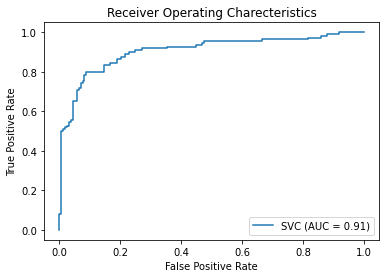

In [111]:
plot_roc_curve(SVC_mod,x_test,y_test)
plt.title("Receiver Operating Charecteristics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC represents the probability that a random positive  example is positioned to the right of a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0

# MODEL SAVING

In [112]:
import joblib
joblib.dump(SVC_mod,"Titanic_Project_Final_Result.pkl")

['Titanic_Project_Final_Result.pkl']